In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Define constants
calorific_value_fuel = 42.8e6  # J/kg
air_density = lambda T, RH: 1.225 * (1 - RH / 100) * (293.15 / T)  # Simplified air density
efficiency = 0.3  # Engine efficiency (can be made variable)
cycle_time = 0.02  # in seconds, example

In [14]:
# Function to calculate power output
def power_output(T_inlet, humidity):
    air_intake = air_density(T_inlet, humidity)  # Density of air based on temp and humidity
    return efficiency * air_intake * calorific_value_fuel / cycle_time

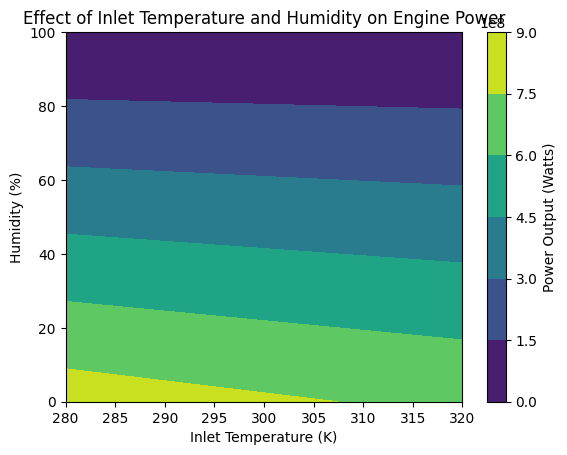

In [15]:
# Simulation: vary inlet temperature and humidity
T_inlets = np.linspace(280, 320, 50)  # Inlet temperature in Kelvin
humidities = np.linspace(0, 100, 50)  # Humidity from 0% to 100%

# Compute power for each combination of temperature and humidity
power_matrix = np.array([[power_output(T, H) for H in humidities] for T in T_inlets])

# Plotting the results
T_inlet_mesh, humidity_mesh = np.meshgrid(T_inlets, humidities)

plt.contourf(T_inlet_mesh, humidity_mesh, power_matrix.T, cmap='viridis')
plt.title("Effect of Inlet Temperature and Humidity on Engine Power")
plt.xlabel("Inlet Temperature (K)")
plt.ylabel("Humidity (%)")
plt.colorbar(label="Power Output (Watts)")
plt.show()